In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nsmod
import os 
%matplotlib inline
from numpy import sin, cos

from nsmod.manual_switching_torque_with_Euler import main
from nsmod import Plot, File_Functions, Physics_Functions

figsize = (4.5, 3.5)
plt.style.use("thesis")

## Variations due to free precession

./data/Unknown_SpindownTorqueSwitching_1_chi0_6.0000000000e+01_omega0_1.00e+02_epsI3_5.00e-06_AnomTorqueSwitching_1_epsA_0.00e+00_a0_3.0000000000e+00_SwitchTime_1.00e+02_AnomTorque_1_upsilon_0.00e+00_n_50000_epsI1_0.00e+00_T_6.53e+04.hdf5
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED


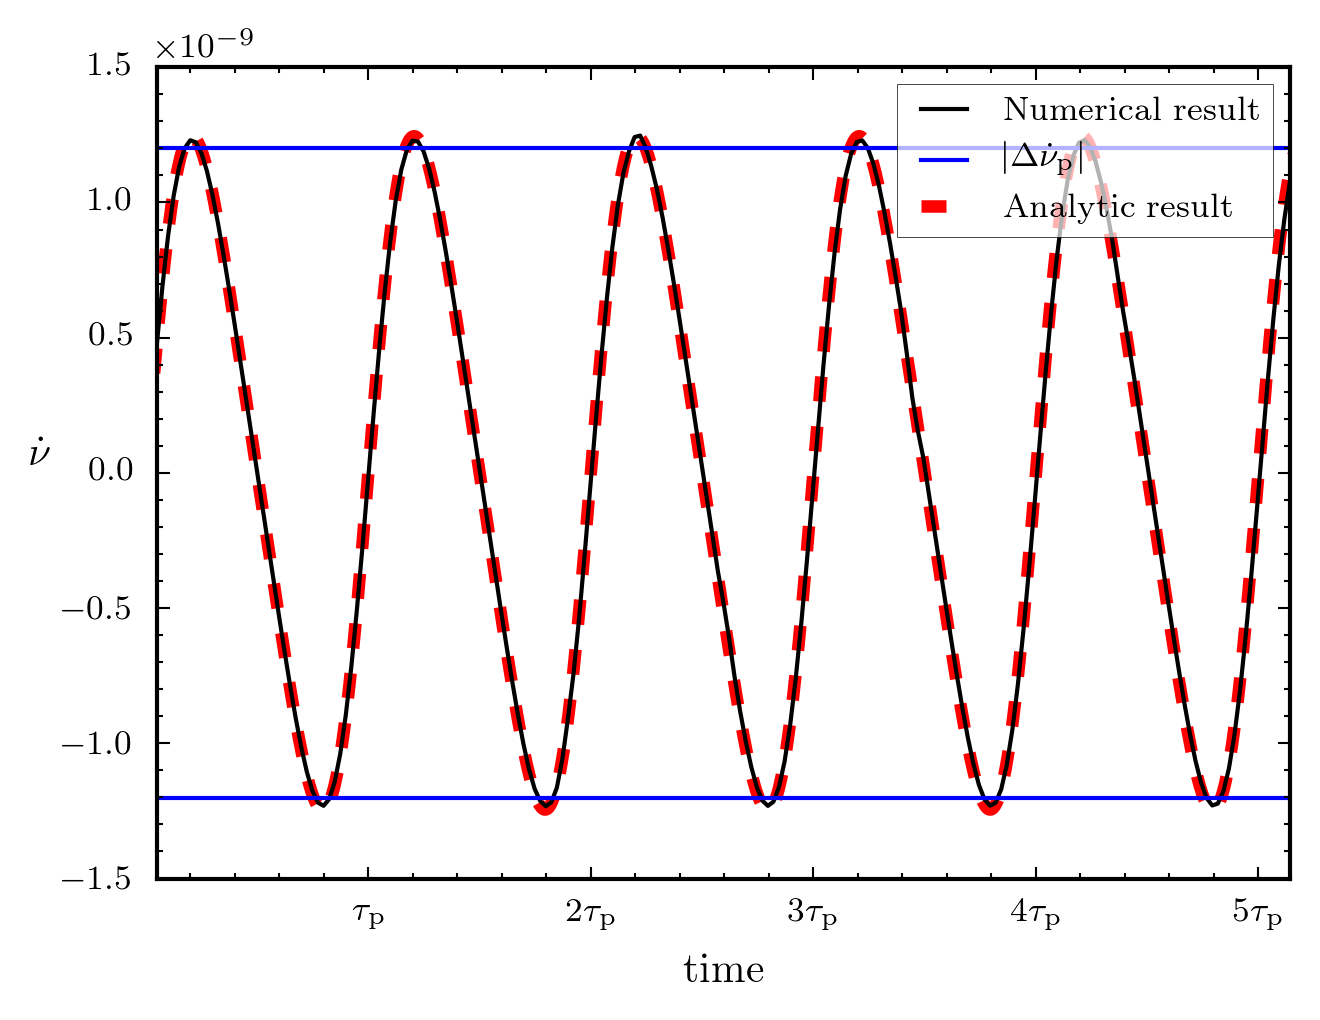

In [5]:
def SignalModel_FP(theta, t):
    omega0, epsI, a0, chi = theta
    psidot = -epsI*omega0
    psi = psidot*t + np.pi/2.
    return (psidot**2*(2*(sin(chi)*cos(a0) - sin(a0)*sin(psi)*cos(chi))
                      *(sin(chi)*sin(a0)*sin(psi) + cos(chi)*cos(a0))*sin(chi)
                      - ((sin(chi)*sin(psi)*cos(a0) - sin(a0)*cos(chi))**2
                      + sin(chi)**2*cos(psi)**2)*cos(chi))*sin(chi)*sin(a0)
                      *cos(psi)/((sin(chi)*sin(psi)*cos(a0)
                    - sin(a0)*cos(chi))**2 
                      + sin(chi)**2*cos(psi)**2)**2
                        ) / (2*np.pi) 

epsI3 = 5e-6
omega0 = 1e2
epsA = 0.0
chi0 = 60.0
tauP = 2 * np.pi/(epsI3 * omega0)
T = 5.2 * tauP
a0 = 3.0

n = 50000
error = 1e-13

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 )

#File_Functions.PrintParameterDictionary(file_name)

ax = Plot.SpindownRate(file_name, analytic=["FP"], label="Numerical result", figsize=figsize)

# Analytic plot
time = np.linspace(0, T, 1000)
ax.plot(time, SignalModel_FP([omega0, epsI3, np.radians(a0), np.radians(chi0)], time), 
                             "--r", lw=3.0, zorder=-10, label="Analytic result")
plt.legend(frameon=True, loc=1, framealpha=0.7)
plt.tight_layout()
plt.savefig("img/nu_dot_no_torque.pdf")
File_Functions.PropertiesTable(file_name, "nu_dot_no_torque.tex")
plt.show()

## With the torque

BETA FUNCTION IS USED
BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
AnomTorqueSwitching : 1.0000000000e+00
Bs : 1.8973665961e+14
DeltaPhi_49 : 3.0731101679e-02
DeltaPhi_49_SpindownTorque : 1.6122741629e-06
DeltaPhi_63 : 4.0974802239e-03
DeltaPhi_75 : 9.4440061041e-05
DeltaPhi_TS : -0.0000000000e+00
EMtorqueAmplificationfactor : 4.1887902048e-01
P : 6.2831853072e-01
SpindownTorqueSwitching : 1.0000000000e+00
SwitchTime : 1.0000000000e+02
T : 6.5300000000e+05
a0 : 3.0000000000e+00
beta : -4.9569981087e-02
beta30 : -4.9669220089e-02
beta75 : -2.8598346449e-02
chi0 : 6.0000000000e+01
delta_omega_dot0_EM : 3.5367765132e-11
delta_omega_dot0_FP : 7.5574973510e-11
delta_omega_dot0_FP_EM : 1.0076663135e-11
epsA : 1.0000000000e-08
epsI1 : 0.0000000000e+00
epsI3 : 5.0000000000e-06
n : 5.0000000000e+04
nu_dot0 : -2.6525823849e-11
omega0 : 1.0000000000e+01
omega_dot0 : -1.6666666667e-10
source_script : Unknown
tauA : 6.2831853072e+07
tauE : 6.0000000000e+10
tauP : 1.2566370614e+05
tauS : 4.50

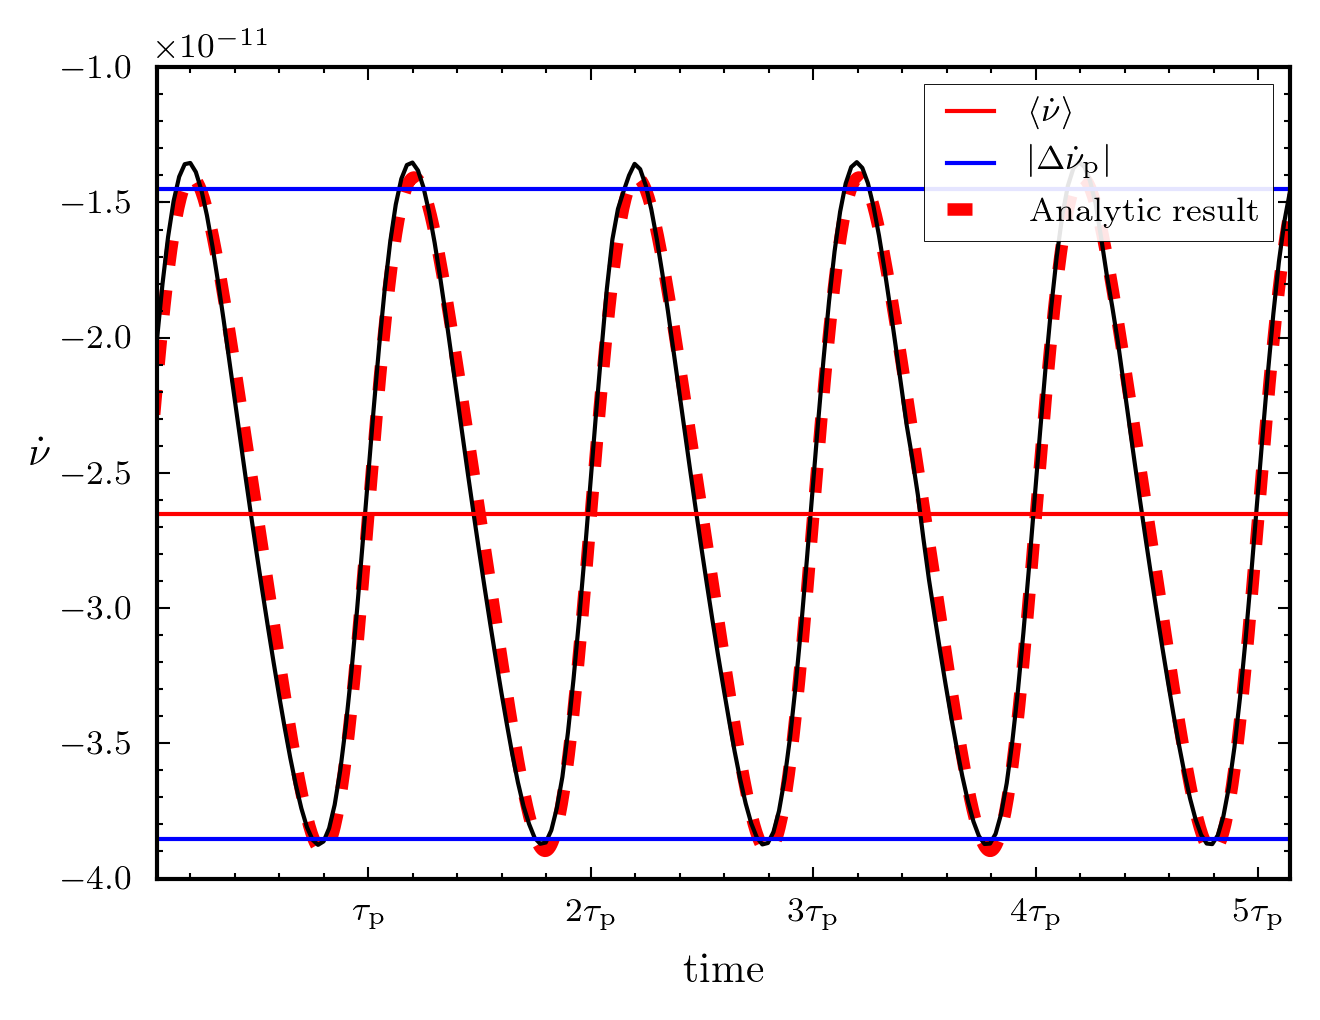

In [6]:
epsI3 = 5e-6
omega0 = 1e1
epsA = 1e-8
chi0 = 60.0
tauP = 2 * np.pi/(epsI3 * omega0)
T = 5.2 * tauP
a0 = 3.0

n = 50000
error = 1e-13

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False,
                 )

File_Functions.PrintParameterDictionary(file_name)
PD = File_Functions.Parameter_Dictionary(file_name)

ax = Plot.SpindownRate(file_name, analytic=["FP", "EM"], figsize=figsize)

# Analytic plot
time = np.linspace(0, T, 1000)
ax.plot(time, PD['nu_dot0'] + SignalModel_FP([omega0, epsI3, np.radians(a0), np.radians(chi0)], time), 
                             "--r", lw=3.0, zorder=-10, label="Analytic result")


plt.legend(framealpha=0.9)
plt.tight_layout()
plt.savefig("img/nu_dot_with_torque.pdf")
File_Functions.PropertiesTable(file_name, "nu_dot_with_torque.tex")
plt.show()

## Amplification by the EM torque

BETA FUNCTION IS USED
BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
AnomTorqueSwitching : 1.0000000000e+00
Bs : 1.8973665961e+14
DeltaPhi_49 : 3.1088805038e-02
DeltaPhi_49_SpindownTorque : 2.6871182306e-05
DeltaPhi_63 : 1.1514372236e-01
DeltaPhi_75 : 2.6847605520e-03
DeltaPhi_TS : -0.0000000000e+00
EMtorqueAmplificationfactor : 1.1635528347e+01
P : 6.2831853072e-02
SpindownTorqueSwitching : 1.0000000000e+00
SwitchTime : 1.0000000000e+02
T : 1.0900000000e+05
a0 : 3.0000000000e+00
beta : -8.2561502853e-02
beta30 : -8.2837165768e-02
beta75 : -4.7609003618e-02
chi0 : 6.0000000000e+01
delta_omega_dot0_EM : 3.5367765132e-08
delta_omega_dot0_FP : 2.7206990464e-09
delta_omega_dot0_FP_EM : 1.0076663135e-08
epsA : 1.0000000000e-08
epsI1 : 0.0000000000e+00
epsI3 : 3.0000000000e-06
n : 5.0000000000e+04
nu_dot0 : -2.6525823849e-08
omega0 : 1.0000000000e+02
omega_dot0 : -1.6666666667e-07
source_script : Unknown
tauA : 6.2831853072e+06
tauE : 6.0000000000e+08
tauP : 2.0943951024e+04
tauS : 4.50

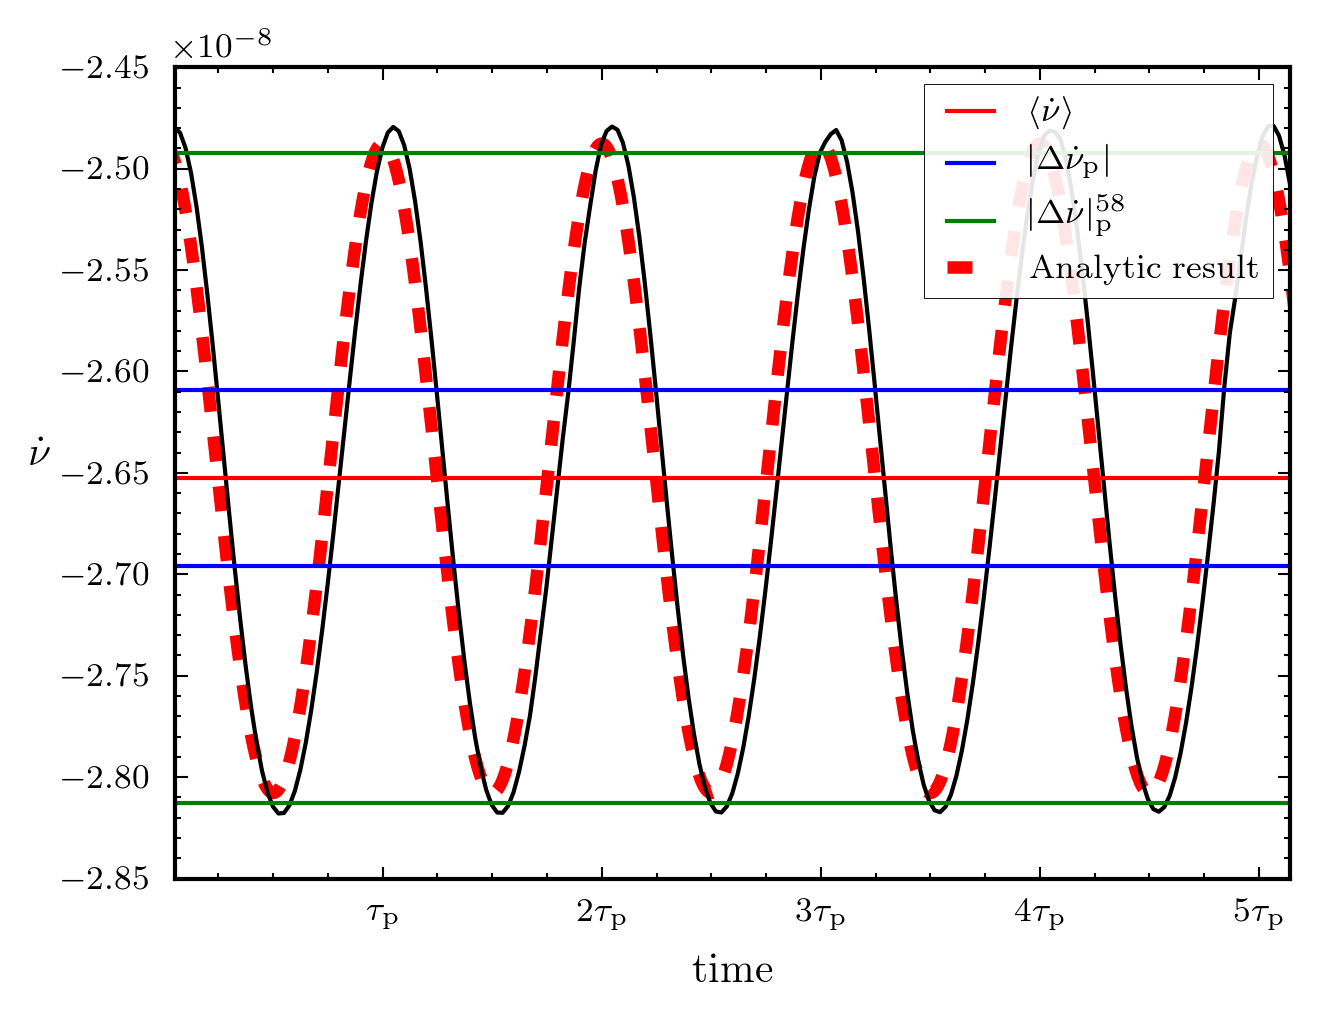

BETA FUNCTION IS USED
BETA FUNCTION IS USED


In [8]:
def SignalModel_EM(theta, t):
    omega0, epsI, a0, chi, epsA = theta
    
    psi = -epsI*omega0*t + np.pi/2.

    Sin2Theta = 1 - (sin(a0)*sin(psi)*sin(chi) + cos(a0)*cos(chi))**2
    Phidot = 1 - epsI * sin(chi) * (cos(a0) *sin(chi) - sin(psi) * sin(a0) * cos(chi)) / (
                        (sin(a0)*cos(chi) - cos(a0)*sin(psi)*sin(chi))**2 + (cos(psi) * sin(chi))**2)

    # Standard values for c , R in cgs
    c = 3e10
    R = 1e6
    k = 2/3.0 * R/c * epsA * omega0**3 
    return -k * Phidot**3 * Sin2Theta / (2*np.pi)

epsI3 = 3e-6
omega0 = 1e2
epsA = 1e-8
chi0 = 60.0
tauP = 2 * np.pi/(epsI3 * omega0)
T = 5.2 * tauP
a0 = 3.0

n = 50000
error = 1e-13

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False,
                 )

File_Functions.PrintParameterDictionary(file_name)

ax = Plot.SpindownRate(file_name, analytic=["FP", "EM", "58"], figsize=figsize)

# Analytic plot
time = np.linspace(0, T, 1000)
ax.plot(time, SignalModel_EM([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA], time), 
                             "--r", lw=3.0, zorder=-10, label="Analytic result")

plt.legend(framealpha=0.9)
plt.tight_layout()
plt.savefig("img/nu_dot_with_torque_EM_amplification.pdf")
plt.show()

File_Functions.PropertiesTable(file_name, "nu_dot_with_torque_EM_amplification.tex")